# Color codes from image

In [ ]:
!pip install opencv-python-headless scikit-learn numpy

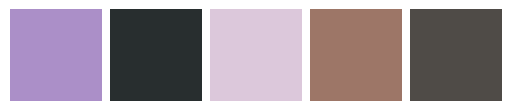

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

def get_dominant_colors(image_path, n_colors):
  
    with Image.open(image_path) as img:
       
        img = img.convert("RGBA")

        img = img.resize((25, 25))

        data = np.array(img.getdata())
        data = data[:, :3]  
        data = data.reshape(-1, 3)

    
        kmeans = KMeans(n_clusters=n_colors)
        kmeans.fit(data)

        colors = kmeans.cluster_centers_
        colors = colors.round(0).astype(int)

        fig, axs = plt.subplots(1, n_colors, figsize=(5, 2),
                                constrained_layout=True,
                                squeeze=False)

        for ax, color in zip(axs[0], colors):
            ax.imshow([[color]])
            ax.axis('off')

        plt.show()

image_path = r'Files\sabri.jpg'  

get_dominant_colors(image_path, 5)